# This dataset is a collection of chess games from Lichess.org. I found this at Kaggle.com

Objective: To uncover the correlation between the strategies employed by chess players and their performance in the game.

Data Set: The chess data set comprises a wealth of information on games played by a diverse set of players, including player ratings, openings used, and game outcomes (win, loss, or draw).

Methods: Through a comprehensive analysis, I will employ a variety of techniques to uncover key insights and relationships between a player's approach to the game and their performance. Specifically, I will delve into the correlation between a player's opening move and their success rate, in order to determine the significance of the initial move in determining the outcome of the game.

Expected Outcomes: The analysis is expected to reveal a strong correlation between the strategies employed by players and their performance in the game. Additionally, it is anticipated that the analysis will indicate that the opening move is a crucial factor in determining the success of a player's performance.

In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as nx
import seaborn as sns
import missingno


In [82]:
chess = pd.read_csv('Chess DS.csv')
chess


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [83]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [84]:
# See if the data has any missing values
chess_missing = chess.isnull().sum()
chess_missing

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

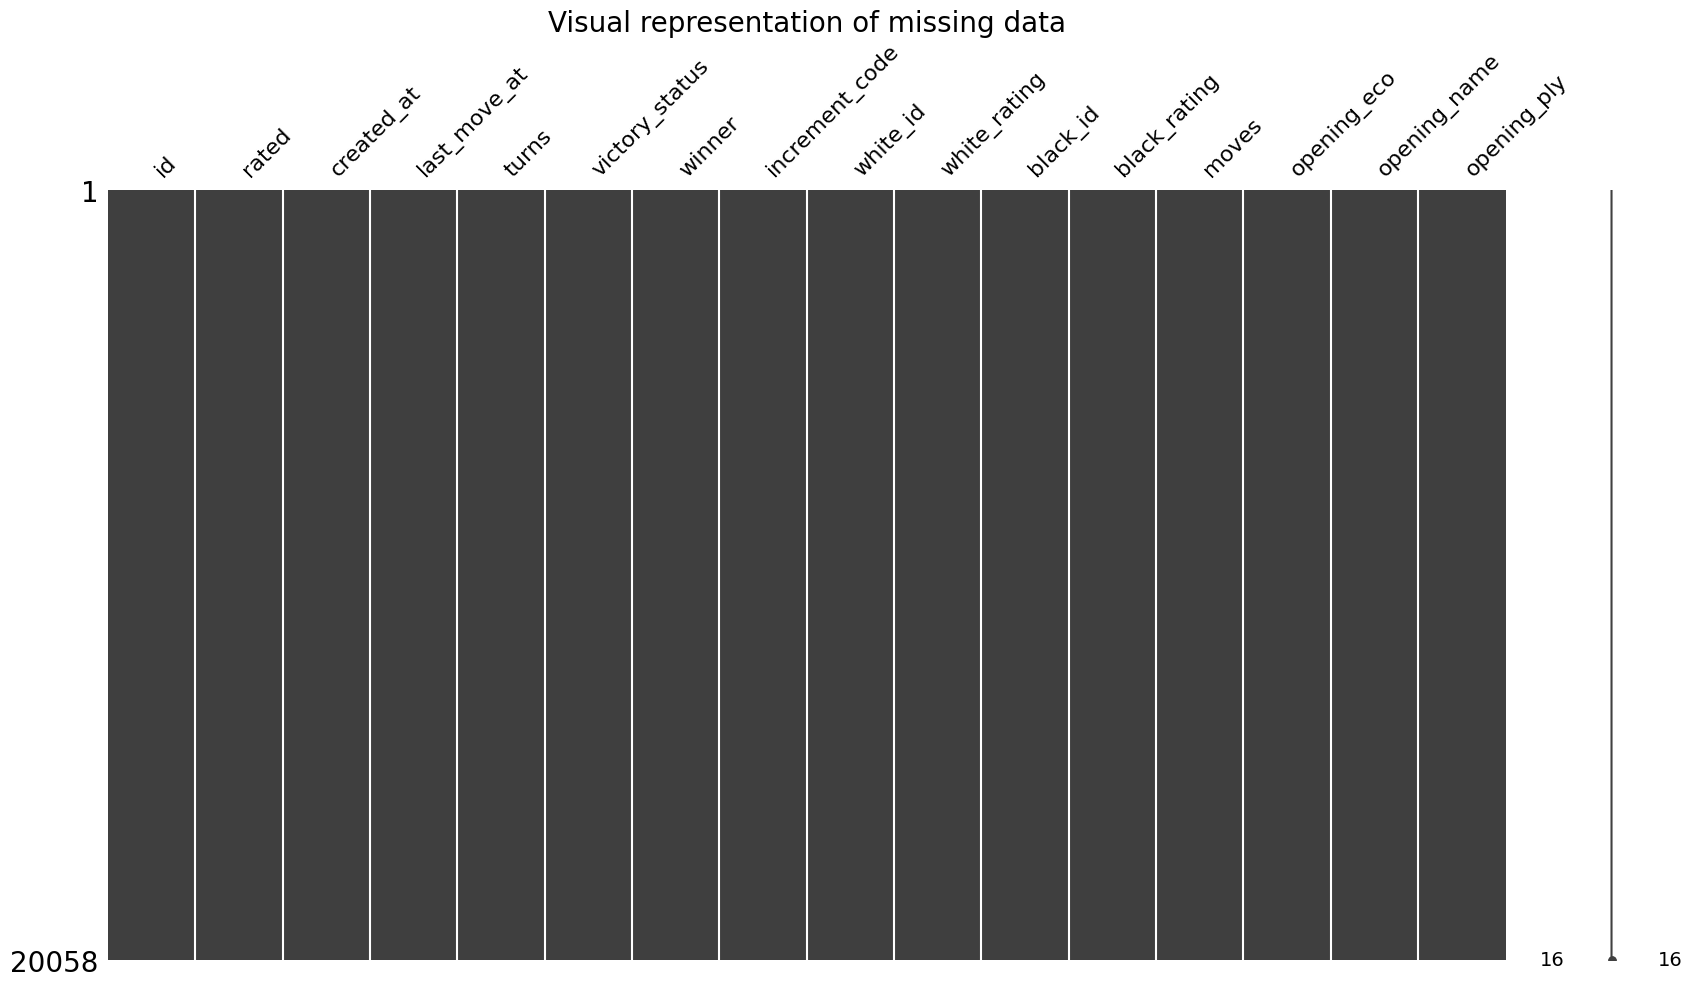

In [85]:
# Visual representation of missing data
missingno.matrix(chess, figsize = (20,10))
plt.title('Visual representation of missing data', fontsize=20)
plt.show()

# Missing Data

As we can observe, the data set is 20,000 rows and 16 columns. Due to the scale of this data set, it is important to keep in mind that visualizations and patterns may need to be presented in a way that is easy to interpret and understand. Fortunately, we can see that the data set is complete with no missing values, and all data types have been verified as accurate.


# Column Descriptions

Upon examination of the data set's columns, I find that all of them are relevant to the analysis. However, I have identified that 'created_at' and 'last_move_at' columns are in Unix time format which may be difficult to interpret. To rectify this, I will convert these columns into a human-readable format by creating new columns and storing the new values. Once the conversion is complete, the original columns 'created_at' & 'last_move_at' will be removed. Additionally, 'id' and 'increment_code' columns are not essential to the analysis and will be removed as well.

In [86]:
# This will convert unix time to datetime and append the new columns onto the end of the data set
chess_time = chess[['created_at','last_move_at']].copy()

chess['first_move_dt'] = pd.to_datetime(chess_time['created_at']/1000, 
                                           unit='s', 
                                           origin='unix')

chess['last_move_dt'] = pd.to_datetime(chess_time['last_move_at']/1000, 
                                             unit='s', 
                                             origin='unix')

chess.tail(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,first_move_dt,last_move_dt
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-09 23:32:32.648999936,2017-07-09 23:44:49.348000000


In [87]:
# We will now drop the old columns as they are redundant along with id and increment code
chess = chess.drop(['created_at','last_move_at','id', 'increment_code'], axis=1)
chess

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,first_move_dt,last_move_dt
0,False,13,outoftime,white,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000
1,True,16,resign,black,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
2,True,61,mate,white,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000
4,True,95,mate,white,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000
20054,True,82,mate,black,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064
20055,True,35,mate,white,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808
20056,True,109,resign,white,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872


In column 'victory_status' it is unknown how many types there can be, so I will check so I can use the column properly

In [88]:
# Check unique values
chess_stat = chess['victory_status'].unique()
chess_stat

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

All data has been correctly formatted. We have removed redundant columns or data that would not make sense to us.

# Rename Columns

Changing columns names so it is easier to understand

In [89]:
chess = chess.rename(columns = {'opening_ply':'opening_play', 'opening_eco':'opening_code', 'rated':'user_rated'})

In [90]:
chess.head(5)

,user_rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_name,opening_play,first_move_dt,last_move_dt
0,False,13,outoftime,white,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31 20:06:40,2017-08-31 20:06:40
1,True,16,resign,black,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,2017-08-30 21:53:20,2017-08-30 21:53:20
2,True,61,mate,white,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,2017-08-30 21:53:20,2017-08-30 21:53:20
3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,2017-08-30 16:20:00,2017-08-30 16:20:00
4,True,95,mate,white,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,2017-08-29 18:06:40,2017-08-29 18:06:40


# Data Visualizations

# Graph displaying which status had the highest %

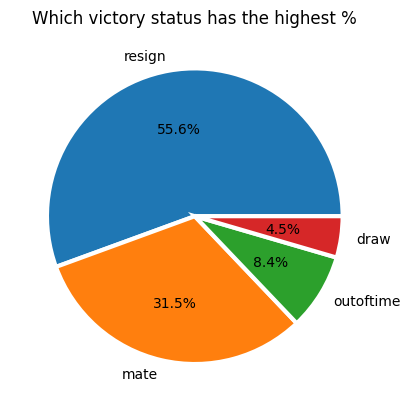

In [91]:
# Count the number of occurrences of each status
status_counts = chess['victory_status'].value_counts()

# Divide by the total number of status's to get the percentage
status_pct = status_counts / status_counts.sum()

# Create a pie chart

plt.pie(status_pct, labels=status_pct.index, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title("Which victory status has the highest %")
plt.show()


As we can see from the pie chart resign had the biggest %. Is there a reason for this? Are the quality of players higher so opponents quit a lot more? 

In [92]:
# Get exact number of resigns
resign_df = chess.loc[chess['victory_status'] == 'resign']
num_res = resign_df['victory_status'].count()
print(num_res)


11147


# Relation between the game ending in a resign and the opponets rating

<AxesSubplot: xlabel='white_rating', ylabel='black_rating'>

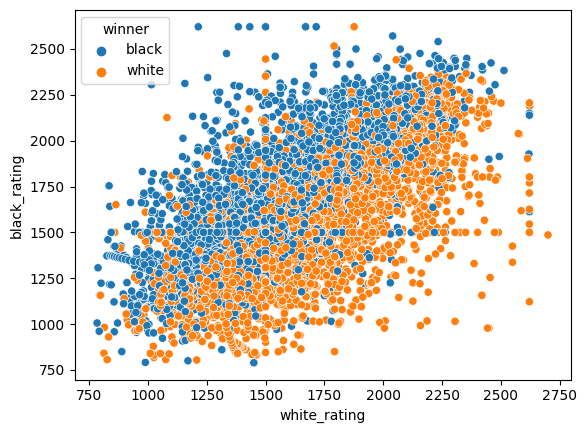

In [93]:
sns.scatterplot(data=resign_df, x="white_rating", y="black_rating", hue="winner")

Based on the scatter plot analysis, there does not appear to be a strong correlation between a player's high rating and their opponent resigning. It is worth noting that chess can be a game that can change rapidly with one poor move, which may contribute to the high rate of resignations, whether due to frustration or the perception that continuing the game would be futile and a waste of time.

# Number of occurrences of the opening code showing only the top 10 

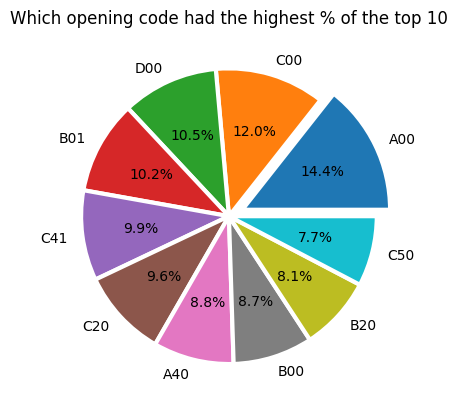

In [94]:
# Count the number of occurrences of the opening code showing only the top 10 
code_counts = chess['opening_code'].value_counts()

# Divide by the total number of codes to get the percentage
code_pct = code_counts / code_counts.sum()

# Get top 10
code_counts = code_counts.head(10)
code_pct = code_pct.head(10)

# Create a pie chart
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(code_pct, labels=code_pct.index, autopct='%1.1f%%', explode=explode, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title("Which opening code had the highest % of the top 10")
plt.show()


In order to make the pie chart more visually appealing, I chose to only display the top 10 most common openings used. From the data, it appears that the top 4 openings have relatively similar percentages. To gain a deeper understanding of this, further analysis is needed to compare more data. This could potentially provide insight into the best starting position for a chess game. It would be interesting to compare more data and see if this trend holds true.

# Number of Wins by Opening Code

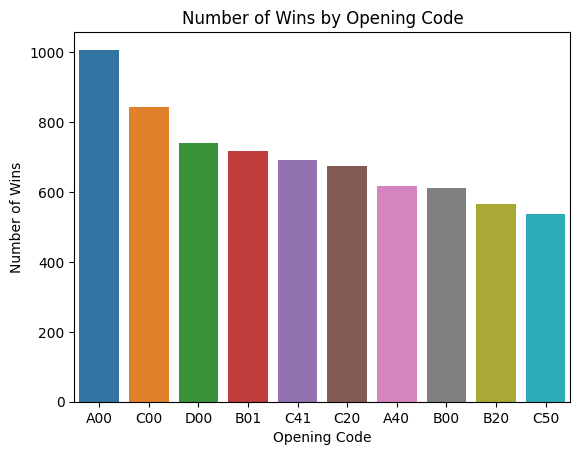

In [95]:
# This will locate the top 10 of opening_code keeping in order of top 10
sns.countplot(data=chess, x="opening_code", order=chess["opening_code"].value_counts().iloc[:10].index)
plt.xlabel('Opening Code')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Opening Code')
plt.show()

The two charts clearly indicate that the top 10 openings used have the highest win rate in order. This observation may explain why these openings are used so frequently. It is worth considering that the high usage of these openings may be a contributing factor to their high win rate, or it could be that they are simply the most effective starting strategies to secure a win

# Comparison between opening turns and winners

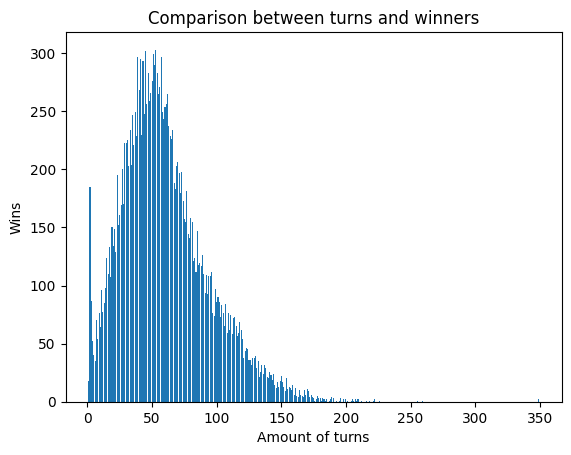

In [96]:
# Count the number of turns by winner
turn_win = chess.groupby('turns')['winner'].count()

# Create a bar chart 
plt.bar(turn_win.index, turn_win.values)
plt.xlabel('Amount of turns')
plt.ylabel('Wins')
plt.title('Comparison between turns and winners')
plt.show()



From the comparison, it is evident that the majority of wins occur around 35-70 turns. Additionally, there is a significant spike at the very beginning of the game. This raises the question of whether there is a correlation between the number of turns taken and the likelihood of winning. To gain further insight, it would be beneficial to examine the gameplay of the top 10% of players with the lowest amount of turns. These players are likely among the most skilled and studying their strategies and tactics could yield valuable information on how to improve one's own gameplay.

# Compare data of the top 10% lowest turns

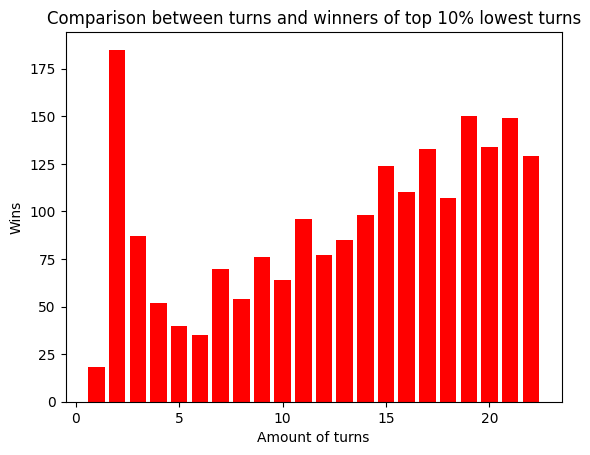

In [97]:
# Find the top 10% of the lowest turns using quantile
threshold = chess['turns'].quantile(0.10)

top_10_percent = chess[chess['turns'] <= threshold]

# Count the number of turns by winner
turn_win_10 = top_10_percent.groupby('turns')['winner'].count()

# Create a bar chart of survival rate by age
plt.bar(turn_win_10.index, turn_win_10.values, color='red')
plt.xlabel('Amount of turns')
plt.ylabel('Wins')
plt.title('Comparison between turns and winners of top 10% lowest turns')
plt.show()

Based on the data, it appears that the second turn has the highest number of wins. From my knowledge of chess, this move is commonly referred to as the "fool's mate," which is typically executed by an inexperienced player. It is important to note that this move is often a result of a mistake made by the opponent, and thus, it may not be a reliable strategy to win in a competitive setting. Therefore, it may be wise to disregard this play in the analysis and focus on more sound strategies.

# Comparison between top 10% of quickest games and their first move

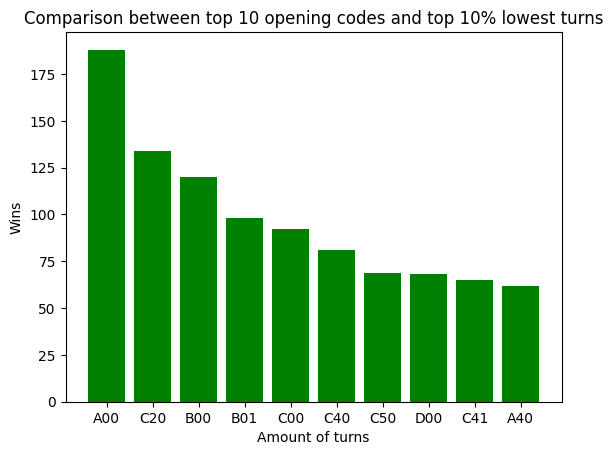

In [98]:
# Group opening code by turns
turn_code_10 = top_10_percent.groupby('opening_code')['turns'].count()

# Show only the top 10 codes as tunrs is already done
turn_code_10 = turn_code_10.sort_values(ascending=False).head(10)

# Create a bar chart of survival rate by age
plt.bar(turn_code_10.index, turn_code_10.values, color='green')
plt.xlabel('Amount of turns')
plt.ylabel('Wins')
plt.title('Comparison between top 10 opening codes and top 10% lowest turns')
plt.show()

This comparison is cross-referencing the top 10 opening codes with the top 10% of games with the lowest number of turns. From the data, it appears that A00 is once again at the top, which was also the most common opening code associated with wins. Based on this information, it is safe to conclude that A00 is the best starting position to play from. I will look further into what the top rated players use

# The Mean of White Player Rating for the top 10 Opening Codes

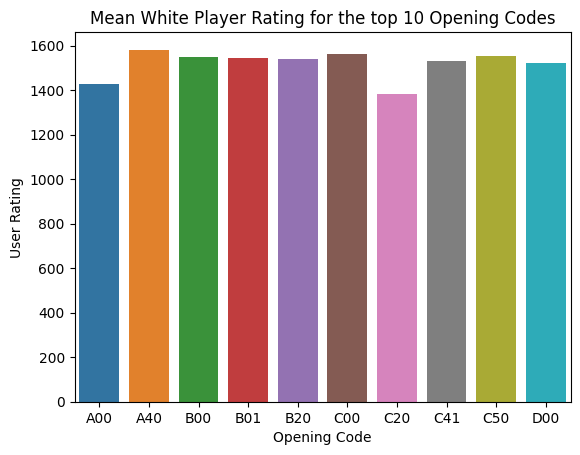

In [99]:
# Finds the 10 largest of opening codes
top_10_openings = chess['opening_code'].value_counts().nlargest(10).index
# Makes a vairable of only the top 10 using isin
top_10_data = chess[chess['opening_code'].isin(top_10_openings)]
# Groups opening code by the mean of white rating
mean_white_ratings = top_10_data.groupby('opening_code')['white_rating'].mean()
sns.barplot(x=mean_white_ratings.index, y=mean_white_ratings.values)
plt.xlabel('Opening Code')
plt.ylabel('User Rating')
plt.title('Mean White Player Rating for the top 10 Opening Codes')
plt.show()

The graph illustrates the average rating of white players for the top 10 opening codes in chess. In order to effectively present the data, the mean was utilized given the large amount of information. As we can observe, the A00 opening code is not utilized by the highest-rated players, with A40 taking its place. This is intriguing as A40 typically ranks lower in other charts and A00 has the highest win rate. 

Additionally, charts for black player ratings will also be created for further analysis.

# The Mean of black Player Rating for the top 10 Opening Codes

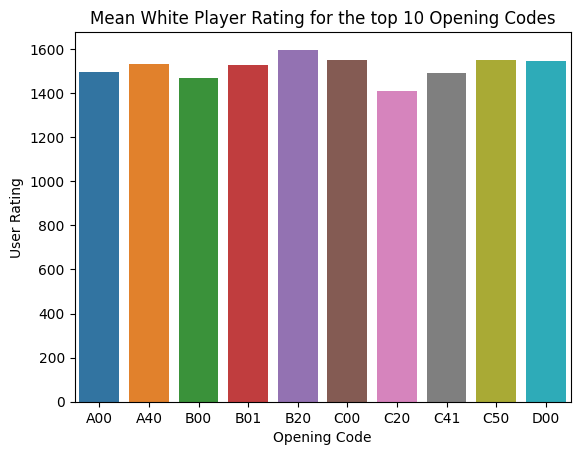

In [100]:
# Use code from the white rating graph
# Groups opening code by the mean of white rating
mean_black_ratings = top_10_data.groupby('opening_code')['black_rating'].mean()
sns.barplot(x=mean_black_ratings.index, y=mean_black_ratings.values)
plt.xlabel('Opening Code')
plt.ylabel('User Rating')
plt.title('Mean White Player Rating for the top 10 Opening Codes')
plt.show()

The graph displays the average rating of black players for the top 10 opening codes in chess. As the data indicates, the A00 opening code is not favored among the highest-rated players, with B20 taking its place. This is noteworthy as B20 is typically not as well represented or ranked lower in previous charts and A00 has the highest win rate.

Despite A00 not reaching the top spot, it's still within the top 10 of the highest rated players. This is still positive data to consider.

# Scatterplot of The Mean of Player Rating for The Top 10 Opening Codes

<AxesSubplot: xlabel='white_rating', ylabel='black_rating'>

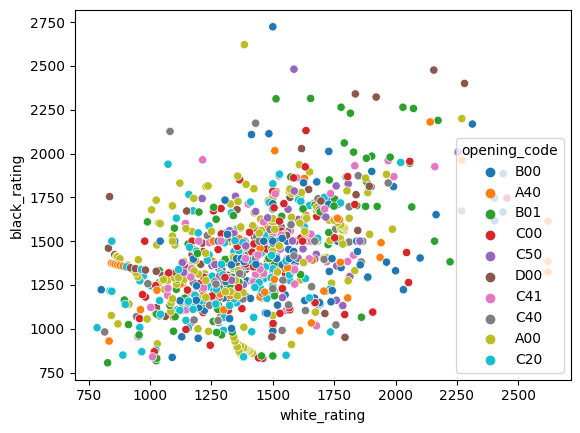

In [101]:
# Find the 10 largest for opening code
top_10_openings = top_10_percent['opening_code'].value_counts().nlargest(10).index
# Makes a vairable of only the top 10 using isin
top_10_data = top_10_percent[top_10_percent['opening_code'].isin(top_10_openings)]
# Scatterplot
sns.scatterplot(data=top_10_data, x="white_rating", y="black_rating", hue="opening_code")

To provide a clearer understanding of the comparison, I thought it would be beneficial to present an alternate representation. At first glance, it appears that A00 is the most frequently used, however, it seems to be primarily utilized by players with average to below average ratings.

The results of extensive data analysis confirm that the initial move plays a significant role in determining the outcome of a game. The A00 move, which is the most commonly used among top players, has been found to have the highest win rate. Furthermore, the top players consistently utilize the top 10 moves, and their superior performance serves as evidence of the correlation between move choice and game outcome.